# XOR gate using neural network

Imports

In [2]:
import numpy as np
import copy
from typing import Callable
import matplotlib.pyplot as plt

### Data (XOR Table)

[0,  0]   ->   0
[0,  1]   ->   1
[1,  0]   ->   1
[1,  1]   ->   0

### Loss function (Mean squared error)


- $ L(y, \hat{y}) =  \frac{1}{2} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

where:
$ \hat{y} $ - predicted output
$y$ - expected output



In [3]:
def mean_squared_error(y_predicted, y_train):
    output = 0
    for idx, i in enumerate(y_predicted):
        output += np.power(y_train[idx]-i, 2)
    return output/2

### Activation functions and their derivatives


- Identity $ \[ f(x) = x \] $
- Identity Derivative $ \[ \frac{df}{dx} = 1 \] $

In [4]:
def act_identity(x):
    return x
    
def act_identity_d(x):
    return 1


- Sigmoid $ \[ f(x) = \frac{1}{1 + e^{-x}} \] $
- Sigmoid derivative $ \[ \frac{df}{dx} = f(x) \cdot (1 - f(x)) \]$

In [5]:
def act_sigmoid(x):
    return 1/(1+np.exp(-x))
    
def act_sigmoid_d(x):
    return act_sigmoid(x)*(1-act_sigmoid(x))


- Bipolar Sigmoid $ \[ f(x) = \frac{2}{1 + e^{-x}} - 1 \] $
- Bipolar Sigmoid Derivative $ \[ \frac{df}{dx} = \frac{1}{2} \cdot (1 + f(x)) \cdot (1 - f(x)) \]$

In [6]:
def act_bipolar(x):
    return  2/(1+np.exp(-x)) - 1
    
def act_bipolar_d(x):
    return 0.5 * (1 + act_bipolar(x)) * (1 - act_bipolar(x))


- Tanh $ \[ \tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} \] $
- Tanh Derivative $ \[ \frac{d\tanh}{dx} = 1 - \tanh^2(x) \]$

In [7]:
def act_tanh(x):
    return np.tanh(x)
    
def act_tanh_d(x):
    return 1-np.tanh(x)**2


- Softplus $ \[ f(x) = \ln(1 + e^x) \] $
- Softplus Derivative $ \[ \frac{df}{dx} = \frac{e^x}{1 + e^x} \]$

In [8]:
def act_sofplus(x):
    return np.log(1+np.exp(x))
    
def act_sofplus_d(x):
    return 1/(1+np.exp(-x))


- ReLU $ \[ f(x) = \max(0, x) \] $
- ReLU Derivative $ \[ \frac{df}{dx} = \begin{cases} 0 & \text{if } x < 0 \\ 1 & \text{if } x \geq 0 \end{cases} \]$

In [9]:
def act_relu(x):
     return np.maximum(0, x)
    
def act_relu_d(x):
    if x < 0:
        return 0
    if x >= 0:
        return 1

### Stop conditions

- loss function value less than

In [10]:
def stop_loss(curr, setn, loss_val, setv, y_predicted, y_train):
    if curr == setn: # max epoch flag
        return False
    if loss_val <= setv:
        return False
    else:
        return True

- proper output of the neural network

In [11]:
def stop_correct(curr, setn, loss_val, setv, y_predicted, y_train):
    if curr == setn: # max epoch flag
        return False
    for idx, i in enumerate(y_predicted):
        if round(i, 2) != round(y_train[idx], 3):
            return True
    return False

### Matrix approach network

In [12]:
class NeuralNetworkMatrix:
    def __init__(self, I, J, K, training_data, Emax: float = 0.001, activation: Callable = act_sigmoid, activation_derivative: Callable = act_sigmoid_d, stop_cond: Callable = stop_loss, epoch_treshhold: int = 10000):
        self.I = I # xi I x 1
        self.J = J # di K x 1, z K x 1
        self.K = K # yi J x 1
        self.training_data = training_data
        self._trainingy()
        self.Emax = Emax
        self.activation = activation
        self.activation_derivative = activation_derivative
        self._initialize_weights()
        self.loss_history = []
        self.stop_cond = stop_cond
        self.epoch_treshhold = epoch_treshhold
                
    def _trainingy(self):
        temp = []
        for i in range(4):
            temp.append(training_data[i][-1][0])
        self.trainingy = temp
        
    def _initialize_weights(self):
        self.W = np.random.normal(loc=1, scale=0.1, size=(self.K, self.J))
        # print(f"Weights W: {self.W}")
        np.random.seed(100)
        self.V = np.random.normal(loc=1, scale=0.1, size=(self.J, self.I))
        # print(f"Weights V: {self.V}")
        self.V[self.J-1] = np.array([0, 0, 1])
        self.Wm = np.zeros((self.K, self.J))
        self.Vm = np.zeros((self.J, self.I))
    
    def train(self, n, alpha, momentum: float = 0.8):
        l = 1 # epoch counter
        E = np.inf
        while self.stop_cond(curr=l, setn=self.epoch_treshhold, loss_val=E, setv=self.Emax, y_predicted=self.predict(testing_data), y_train=self.trainingy):
            E = 0 # function loss value
            for x_d in training_data:
                x = x_d[0] # x <- xl
                d = x_d[1] # d <- dl
                
                y_not = np.ones((self.J, ))
                y = np.ones((self.J, )) # hidden layer 
                z = np.ones((self.K, )) # output layer
                y[self.J-1] = -1 # yiJ = -1
        
                for j in range(self.J-1):
                    transvj = np.transpose(self.V[j])
                    vtjx = np.dot(transvj, x)
                    y_not[j] =  vtjx
                    y[j] = self.activation(vtjx)
        
                for k in range(self.K):
                    transvk = np.transpose(self.W[k])
                    wtky = np.dot(transvk, y)
                    z[k] = self.activation(wtky)
                
                E = E + mean_squared_error(z, d)
        
                deltaz = np.zeros((self.K, ))
                
                deltay = np.zeros((self.J, ))
                
                for k in range(self.K):
                    deltaz[k]=(d[k]-z[k])*self.activation_derivative(z[k])
        
                for j in range(self.J-1):
        
                    sumdw = 0
                    for k in range(self.K):
                        sumdw += deltaz[k]*self.W[k][j]
        
                    deltay[j]=self.activation_derivative(y_not[j])*sumdw
                
                if momentum:
                    
                    # Output layer weight actualization
                    for k in range(self.K):
                        for j in range(self.J):
                            self.W[k][j] = self.W[k][j] + (n*deltaz[k]*y[j] + alpha*self.Wm[k][j])
                            self.Wm[k][j] = copy.deepcopy(n*deltaz[k]*y[j])
                            
                    # Hidden layer weight actualization
            
                    for j in range(self.J-1):
                        for i in range(self.I):
                            self.V[j][i] = self.V[j][i] + (n*deltay[j]*x[i] + alpha*self.Vm[j][i])
                            self.Vm[j][i] = copy.deepcopy(n*deltay[j]*x[i])
                    
                else:
                    # Output layer weight actualization
                    for k in range(self.K):
                        for j in range(self.J):
                            self.W[k][j] = self.W[k][j] + n*deltaz[k]*y[j]
            
                    # Hidden layer weight actualization
            
                    for j in range(self.J-1):
                        for i in range(self.I):
                            self.V[j][i] = self.V[j][i] + n*deltay[j]*x[i]
                            
            # print(f"Current loss: {E}")
            self.loss_history.append(E)
            l+=1
        
        print(f"MSE: {E}")   
        print(f"Epoch: {l}")
        return self.loss_history

    def predict(self, input_data: list = [[0, 0], [0, 1], [1, 0], [1, 1]]):
        for_loop = copy.deepcopy(input_data)
        output = []
        for x in for_loop:
            x.append(-1)
            y = np.zeros((self.J, )) # hidden layer
            z = np.zeros((self.K, )) # output layer
            y[self.J-1] = -1 # yiJ = -1
    
            for j in range(self.J-1):
                transvj = np.transpose(self.V[j])
                vtjx = np.dot(transvj, x)
                y[j] = self.activation(vtjx)
    
            for k in range(self.K):
                transvk = np.transpose(self.W[k])
                wtky = np.dot(transvk, y)
                z[k] = self.activation(wtky)
            output.append(z[0])
        return output

### Scalar approach network

In [13]:
class NeuralNetworkScalar:
    def __init__(self, I, J, K, training_data, Emax: float = 0.001, activation: Callable = act_sigmoid, activation_derivative: Callable = act_sigmoid_d, stop_cond: Callable = stop_loss, epoch_treshhold: int = 10000):
        self.I = I # xi I x 1
        self.J = J # di K x 1, z K x 1
        self.K = K # yi J x 1
        self.training_data = training_data
        self._trainingy()
        self.Emax = Emax
        self.activation = activation
        self.activation_derivative = activation_derivative
        self._initialize_weights()
        self.loss_history = []
        self.stop_cond = stop_cond
        self.epoch_treshhold = epoch_treshhold
                
    def _trainingy(self):
        temp = []
        for i in range(4):
            temp.append(training_data[i][-1][0])
        self.trainingy = temp
    
    def _initialize_weights(self):
        np.random.seed(100)
        self.W = np.random.normal(loc=1, scale=0.1, size=(self.K, self.J))
        # print(f"Weights W: {self.W}")
        np.random.seed(100)
        self.V = np.random.normal(loc=1, scale=0.1, size=(self.J, self.I))
        # print(f"Weights V: {self.V}")
        self.V[self.J-1] = np.array([0, 0, 1])
        self.Wm = np.zeros((self.K, self.J))
        self.Vm = np.zeros((self.J, self.I))
        
    def train(self, n, alpha, momentum: float = 0.8):
        l = 1 # epoch counter
        E = np.inf
        while self.stop_cond(curr=l, setn=self.epoch_treshhold, loss_val=E, setv=self.Emax, y_predicted=self.predict(testing_data), y_train=self.trainingy):
            E=0
            for x_d in training_data:
                
                x = x_d[0] 
                d = x_d[1] 
                
                y1 = self.V[0][0] * x[0] + self.V[0][1] * x[1] - self.V[0][2]
                y2 = self.V[1][0] * x[0] + self.V[1][1] * x[1] - self.V[1][2]
                o1 = self.activation(y1)
                o2 = self.activation(y2)
                o3 = o1 * self.W[0][0] + o2 * self.W[0][1] - self.W[0][2]
                o3 = self.activation(o3)
                
                E = E + mean_squared_error([o3], d)
                
                deltaz1 = (d - o3)*self.activation_derivative(o3)
                
                deltay1 =  self.activation_derivative(y1)*deltaz1*self.W[0][0]
                deltay2 =  self.activation_derivative(y2)*deltaz1*self.W[0][1]
            
                if momentum:
                    self.W[0][0] = self.W[0][0] + (n*deltaz1[0]*o1 + alpha*self.Wm[0][0])
                    self.Wm[0][0] = copy.deepcopy(n*deltaz1[0]*o1)
                    self.W[0][1] = self.W[0][1] + (n*deltaz1[0]*o2 + alpha*self.Wm[0][1])
                    self.Wm[0][1] = copy.deepcopy(n*deltaz1[0]*o2)
                    self.W[0][2] = self.W[0][2] - (n*deltaz1[0] + alpha*self.Wm[0][2])
                    self.Wm[0][2] = copy.deepcopy(n*deltaz1[0])
                    
                    self.V[0][0] = self.V[0][0] + (n*deltay1[0]*x[0] + alpha*self.Vm[0][0])
                    self.Vm[0][0] = copy.deepcopy(n*deltay1[0]*x[0])
                    self.V[0][1] = self.V[0][1] + (n*deltay1[0]*x[1] + alpha*self.Vm[0][1])
                    self.Vm[0][1] = copy.deepcopy(n*deltay1[0]*x[1])
                    self.V[0][2] = self.V[0][2] - (n*deltay1[0] + alpha*self.Vm[0][2])
                    self.Vm[0][2] = copy.deepcopy(n*deltay1[0])
                    self.V[1][0] = self.V[1][0] + (n*deltay2[0]*x[0] + alpha*self.Vm[1][0])
                    self.Vm[1][0] = copy.deepcopy(n*deltay2[0]*x[0])
                    self.V[1][1] = self.V[1][1] + (n*deltay2[0]*x[1] + alpha*self.Vm[1][1])
                    self.Vm[1][1] = copy.deepcopy(n*deltay2[0]*x[1])
                    self.V[1][2] = self.V[1][2] - (n*deltay2[0] + alpha*self.Vm[1][2])
                    self.Vm[1][2] = copy.deepcopy(n*deltay2[0])
                else:
                    self.W[0][0] = self.W[0][0] + n*deltaz1[0]*o1
                    self.W[0][1] = self.W[0][1] + n*deltaz1[0]*o2
                    self.W[0][2] = self.W[0][2] - n*deltaz1[0]
                    
                    self.V[0][0] = self.V[0][0] + n*deltay1[0]*x[0]
                    self.V[0][1] = self.V[0][1] + n*deltay1[0]*x[1]
                    self.V[0][2] = self.V[0][2] - n*deltay1[0]
                    self.V[1][0] = self.V[1][0] + n*deltay2[0]*x[0]
                    self.V[1][1] = self.V[1][1] + n*deltay2[0]*x[1]
                    self.V[1][2] = self.V[1][2] - n*deltay2[0] 
        
            # print(f"Current loss: {E}")
            self.loss_history.append(E)
            l+=1
        
        print(f"MSE: {E}")
        print(f"Epoch: {l}")
        return self.loss_history
        
    def predict(self, testing_data):
        output = []
        for_loop = copy.deepcopy(testing_data)
        for x in for_loop: 
            y1 = self.V[0][0] * x[0] + self.V[0][1] * x[1] - self.V[0][2]
            y2 = self.V[1][0] * x[0] + self.V[1][1] * x[1] - self.V[1][2]
            y1 = self.activation(y1)
            y2 = self.activation(y2)
            z1 = y1 * self.W[0][0] + y2 * self.W[0][1] - self.W[0][2]
            z1 = self.activation(z1)
            output.append(z1)
        return output

## Data preparation

In [14]:
                  # xi      # di
training_data = [[[0, 0, -1], [0]],
                 [[0, 1, -1], [1]],
                 [[1, 0, -1], [1]],
                 [[1, 1, -1], [0]]]                 
                 
                 # xi
testing_data = [[0, 0],
                [0, 1],
                [1, 0],
                [1, 1]]

In [15]:
def plot_history(loss_history_dict):
    fig, axs = plt.subplots(3, 2, figsize=(10, 15))
    
    i, j = 0, 0

    sorted_keys = sorted(loss_history_dict.keys(), key=lambda k: max(loss_history_dict[k]), reverse=False)
    for k, (i, j) in zip(sorted_keys, [(i, j) for i in range(3) for j in range(2)]):
        axs[i][j].plot(range(len(loss_history_dict[k])), loss_history_dict[k])
        axs[i][j].axhline(y=0.001, color='red', linestyle='-', label='Loss = 0.001', linewidth=0.5)
        axs[i][j].axvline(x=10000, color='red', linestyle='--', label='Epoch treshhold = 50000', linewidth=0.5)
        axs[i][j].set_title(str(k))
        

## Learning

Setting parameters (6 different configurations for every activation function)

In [33]:
#                   pi = [Stop Condition "C", Learning rate "N", If using momentum True/False "M", Momentum alpha parameter "A"]
parameters_list = [[stop_loss, 0.01, True, 0.3],
                   [stop_loss, 0.01, True, 0.9],
                   [stop_loss, 0.08, True, 0.3],
                   [stop_loss, 0.08, True, 0.9],
                   [stop_loss, 0.15, True, 0.3],
                   [stop_loss, 0.9, True, 0.9]]

loss_history_dict_sig = {}
loss_history_dict_bip = {}
loss_history_dict_relu = {}
loss_history_dict_ide = {}
loss_history_dict_tanh = {}
loss_history_dict_softplus = {}

In [34]:
for p in parameters_list :
    model_matrix = NeuralNetworkMatrix(I=3, J=3, K=1, training_data=training_data, stop_cond=stop_correct, activation=act_sigmoid, activation_derivative=act_sigmoid_d)
    loss_history_dict_sig[f"F: Sigmoid C: stop_correct, N: {p[1]}, M: {p[2]}, A:{p[3]}"] = model_matrix.train(n=p[1], momentum=p[2], alpha=p[3])
    out = model_matrix.predict(testing_data)
    print([round(x, 2) for x in out])

MSE: 0.44146038272815946
Epoch: 10000
[0.34, 0.55, 0.55, 0.6]
MSE: 0.39566483700641236
Epoch: 10000
[0.23, 0.58, 0.58, 0.62]
MSE: 0.0005602751659997276
Epoch: 10000
[0.02, 0.98, 0.98, 0.02]
MSE: 0.00018564659995334138
Epoch: 10000
[0.01, 0.99, 0.99, 0.01]
MSE: 9.654864943908122e-05
Epoch: 10000
[0.01, 0.99, 0.99, 0.01]
MSE: 4.047760157003919e-05
Epoch: 1617
[0.0, 1.0, 1.0, 0.0]


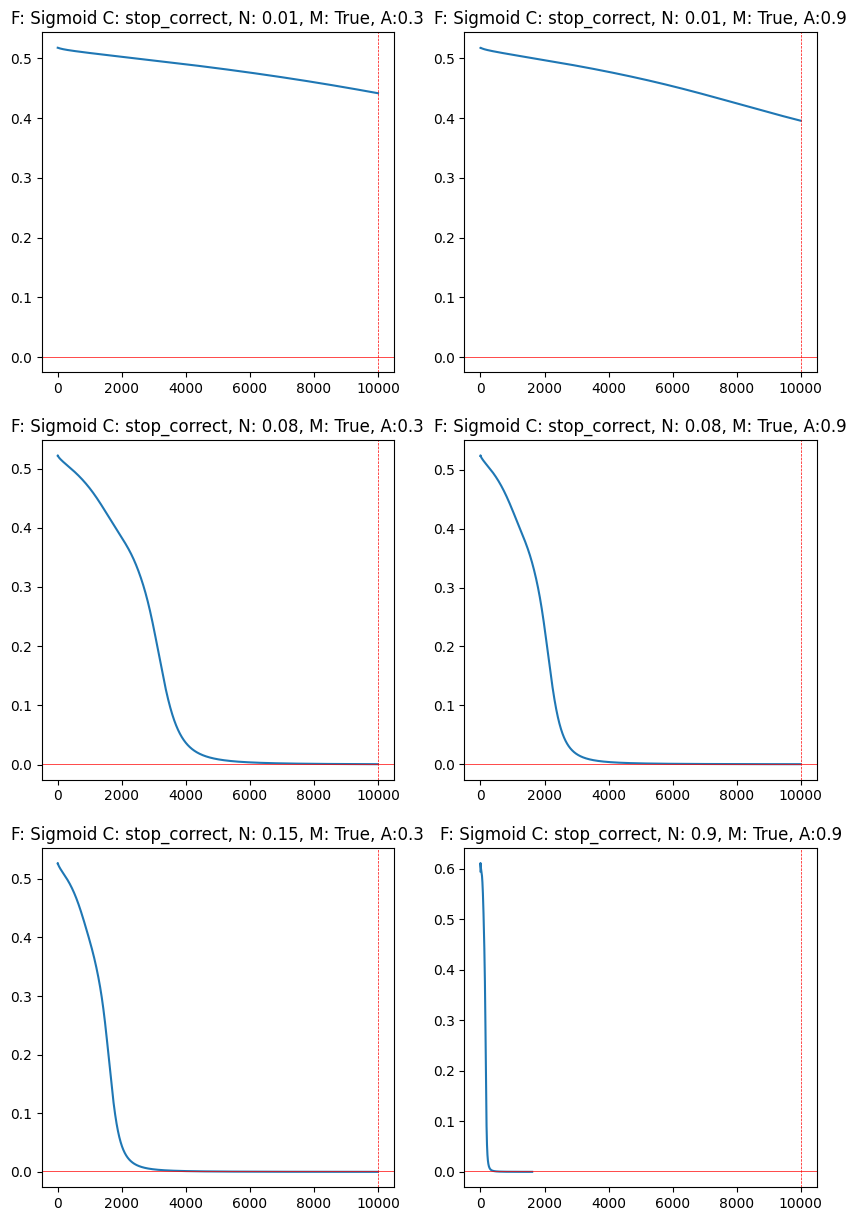

In [35]:
plot_history(loss_history_dict_sig)

In [19]:
for p in parameters_list:
    model_matrix = NeuralNetworkMatrix(I=3, J=3, K=1, training_data=training_data, stop_cond=p[0], activation=act_bipolar, activation_derivative=act_bipolar_d)
    loss_history_dict_bip[f"F: Bipolar C: {p[0].__name__}, N: {p[1]}, M: {p[2]}, A:{p[3]}"] = model_matrix.train(n=p[1], momentum=p[2], alpha=p[3])
    out = model_matrix.predict(testing_data)
    print([round(x, 2) for x in out])

MSE: 0.2949141066555525
Epoch: 10000
[0.09, 0.65, 0.66, 0.59]
MSE: 0.00481956485201364
Epoch: 10000
[0.03, 0.95, 0.95, 0.06]
MSE: 0.0009986528233769353
Epoch: 2042
[0.02, 0.98, 0.98, 0.02]
MSE: 0.0009971596129245202
Epoch: 1350
[0.02, 0.98, 0.98, 0.02]
MSE: 0.000996870893718608
Epoch: 1024
[0.02, 0.98, 0.98, 0.02]
MSE: 0.0009969271252510715
Epoch: 498
[-0.0, 1.0, 1.0, 0.0]


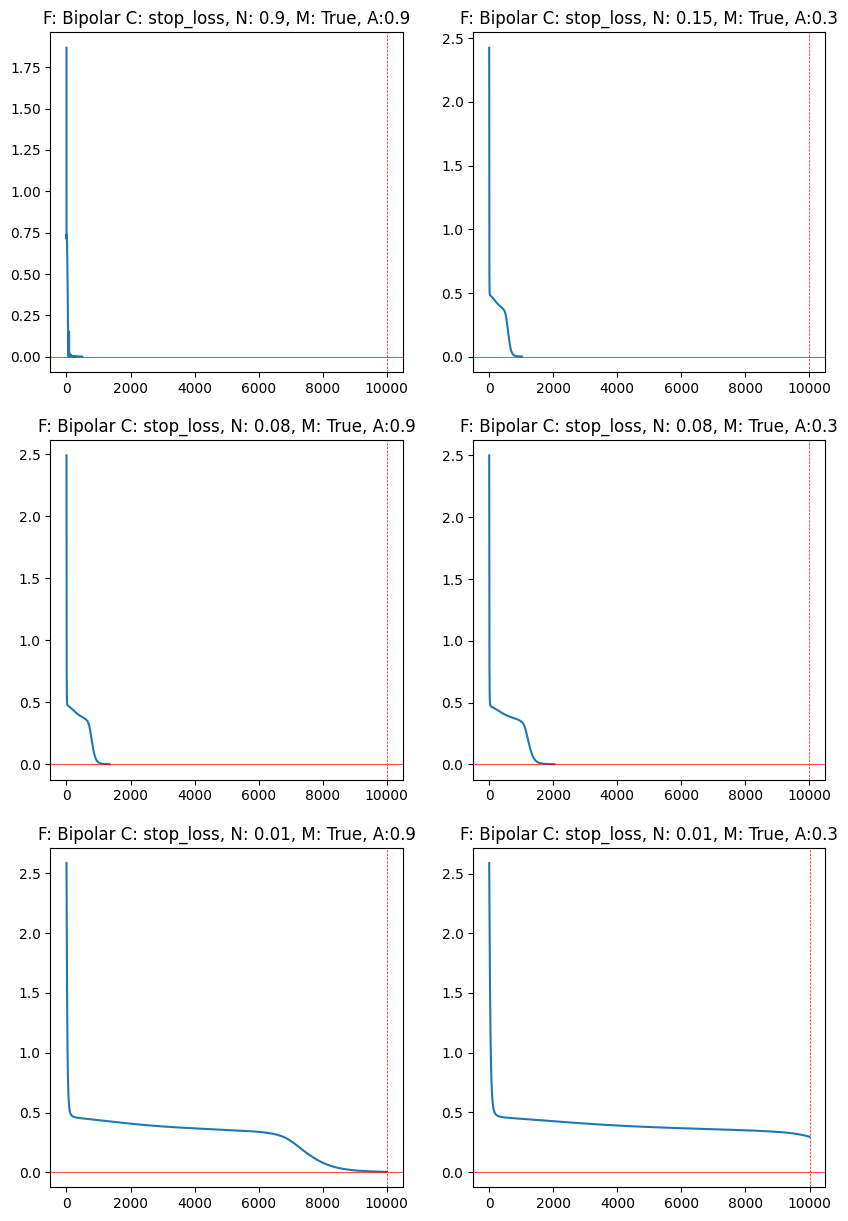

In [20]:
plot_history(loss_history_dict_bip)

In [21]:
for p in parameters_list:
    model_matrix = NeuralNetworkMatrix(I=3, J=3, K=1, training_data=training_data, stop_cond=p[0], activation=act_relu, activation_derivative=act_relu_d)
    loss_history_dict_relu[f"F: ReLU C: {p[0].__name__}, N: {p[1]}, M: {p[2]}, A:{p[3]}"] = model_matrix.train(n=p[1], momentum=p[2], alpha=p[3])
    out = model_matrix.predict(testing_data)
    print([round(x, 2) for x in out])

MSE: 0.3373678037983653
Epoch: 10000
[0.67, 0.67, 0.67, 0.0]
MSE: 0.3387377567858753
Epoch: 10000
[0.67, 0.67, 0.67, 0.0]
MSE: 0.3676565697550136
Epoch: 10000
[0.7, 0.7, 0.7, 0.01]
MSE: 0.5856227277838162
Epoch: 10000
[0.54, 0.54, 0.54, 0.54]
MSE: 0.4019524107224096
Epoch: 10000
[0.73, 0.73, 0.73, 0.02]
MSE: 2.0066942148760325
Epoch: 10000
[0.92, 0.92, 0.92, 0.92]


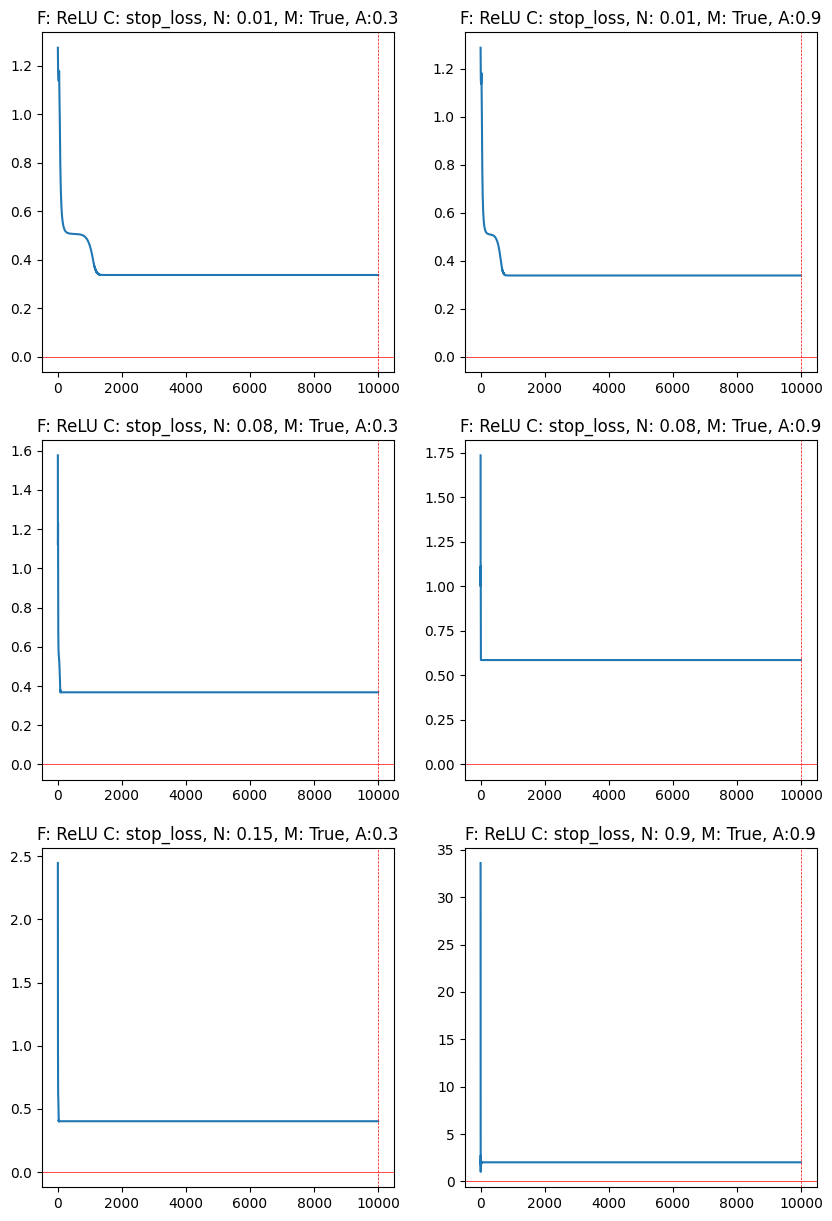

In [22]:
plot_history(loss_history_dict_relu)

In [23]:
for p in parameters_list:
    model_matrix = NeuralNetworkMatrix(I=3, J=3, K=1, training_data=training_data, stop_cond=p[0], activation=act_identity, activation_derivative=act_identity_d)
    loss_history_dict_ide[f"F: Identity C: {p[0].__name__}, N: {p[1]}, M: {p[2]}, A:{p[3]}"] = model_matrix.train(n=p[1], momentum=p[2], alpha=p[3])
    out = model_matrix.predict(testing_data)
    print([round(x, 2) for x in out])

MSE: 0.5100518595716508
Epoch: 10000
[0.51, 0.5, 0.5, 0.49]
MSE: 0.5113506173734494
Epoch: 10000
[0.51, 0.5, 0.5, 0.5]
MSE: 0.5560531351899068
Epoch: 10000
[0.51, 0.51, 0.51, 0.51]
MSE: 0.585740551841877
Epoch: 10000
[0.54, 0.54, 0.54, 0.54]
MSE: 0.6123449400414999
Epoch: 10000
[0.52, 0.52, 0.52, 0.52]


C:\Users\Jakub\AppData\Local\Temp\ipykernel_7356\2954737048.py:4: RuntimeWarning: overflow encountered in power
  output += np.power(y_train[idx]-i, 2)
C:\Users\Jakub\AppData\Local\Temp\ipykernel_7356\3623615988.py:70: RuntimeWarning: overflow encountered in scalar multiply
  sumdw += deltaz[k]*self.W[k][j]
C:\Users\Jakub\AppData\Local\Temp\ipykernel_7356\3623615988.py:79: RuntimeWarning: overflow encountered in scalar multiply
  self.W[k][j] = self.W[k][j] + (n*deltaz[k]*y[j] + alpha*self.Wm[k][j])
C:\Users\Jakub\AppData\Local\Temp\ipykernel_7356\3623615988.py:80: RuntimeWarning: overflow encountered in scalar multiply
  self.Wm[k][j] = copy.deepcopy(n*deltaz[k]*y[j])
C:\Users\Jakub\AppData\Local\Temp\ipykernel_7356\3623615988.py:86: RuntimeWarning: invalid value encountered in scalar multiply
  self.V[j][i] = self.V[j][i] + (n*deltay[j]*x[i] + alpha*self.Vm[j][i])
C:\Users\Jakub\AppData\Local\Temp\ipykernel_7356\3623615988.py:87: RuntimeWarning: invalid value encountered in scalar mu

MSE: nan
Epoch: 10000
[nan, nan, nan, nan]


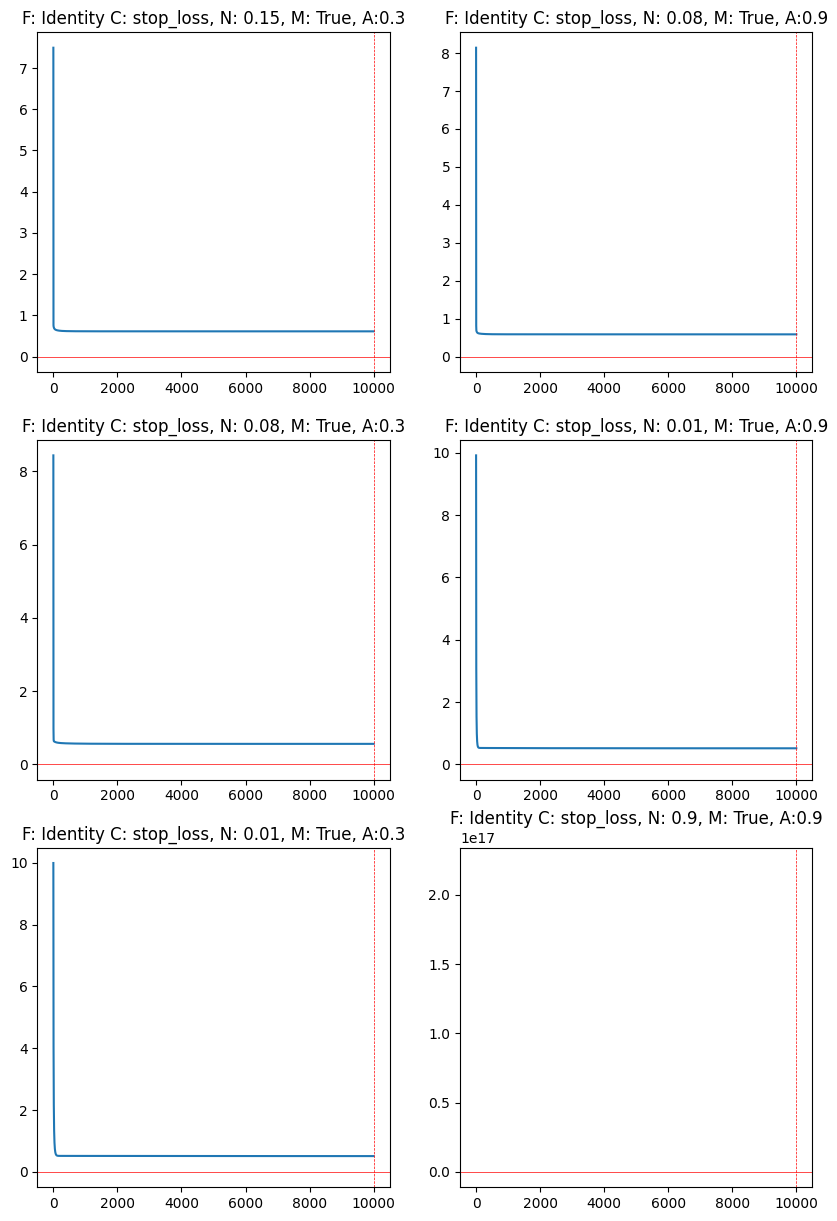

In [24]:
plot_history(loss_history_dict_ide)

In [25]:
for p in parameters_list:
    model_matrix = NeuralNetworkMatrix(I=3, J=3, K=1, training_data=training_data, stop_cond=p[0], activation=act_tanh, activation_derivative=act_tanh_d)
    loss_history_dict_tanh[f"F: Tanh C: {p[0].__name__}, N: {p[1]}, M: {p[2]}, A:{p[3]}"] = model_matrix.train(n=p[1], momentum=p[2], alpha=p[3])
    out = model_matrix.predict(testing_data)
    print([round(x, 2) for x in out])

MSE: 0.3425021000611149
Epoch: 10000
[0.01, 0.66, 0.66, 0.67]
MSE: 0.34219270303373694
Epoch: 10000
[0.01, 0.67, 0.67, 0.67]
MSE: 0.000993490944170991
Epoch: 3518
[0.01, 0.97, 0.97, 0.01]
MSE: 0.0009899807350178744
Epoch: 2233
[0.01, 0.97, 0.97, 0.01]
MSE: 0.0009843536771526108
Epoch: 1691
[0.01, 0.97, 0.97, 0.0]
MSE: 0.62800585055495
Epoch: 10000
[-0.59, 0.99, 0.99, 0.37]


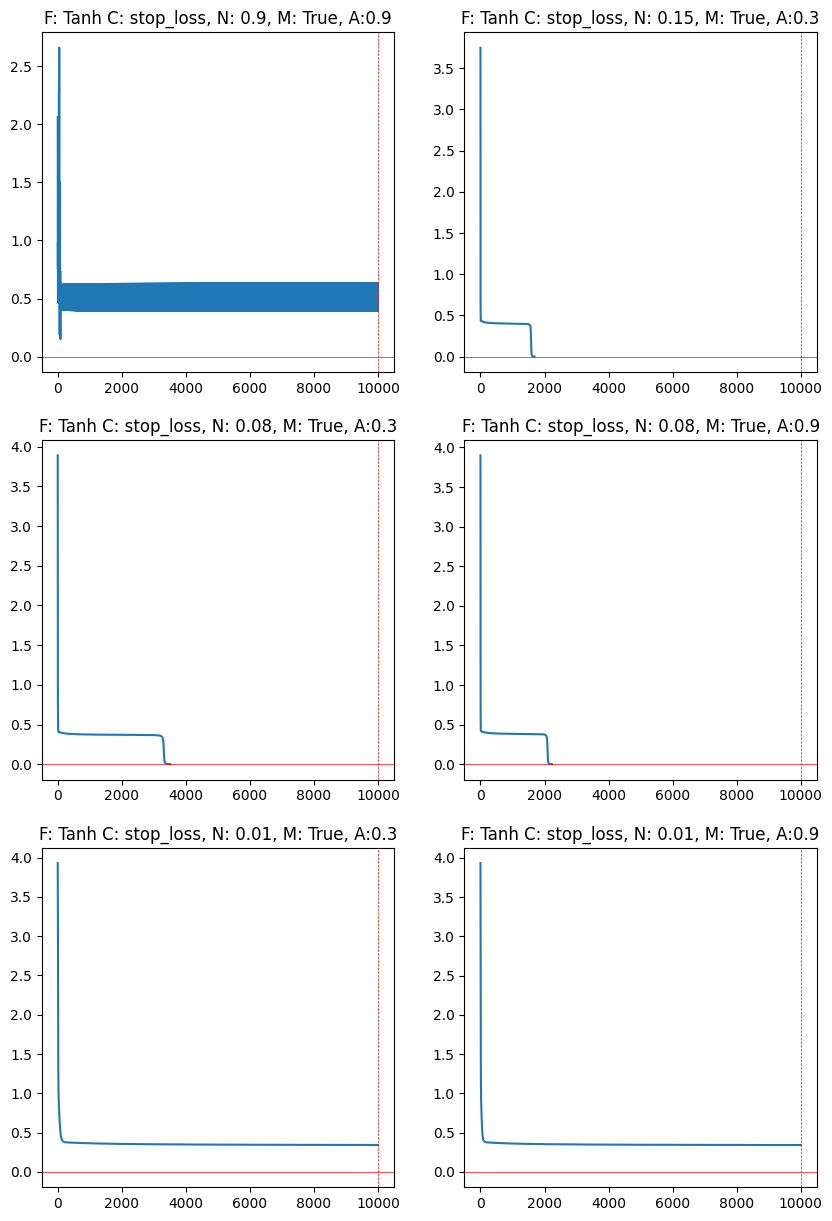

In [26]:
plot_history(loss_history_dict_tanh)

In [27]:
for p in parameters_list:
    model_matrix = NeuralNetworkMatrix(I=3, J=3, K=1, training_data=training_data, stop_cond=p[0], activation=act_sofplus, activation_derivative=act_sofplus_d)
    loss_history_dict_softplus[f"F: Softplus C: {p[0].__name__}, N: {p[1]}, M: {p[2]}, A:{p[3]}"] = model_matrix.train(n=p[1], momentum=p[2], alpha=p[3])
    out = model_matrix.predict(testing_data)
    print([round(x, 2) for x in out])

MSE: 0.30478458082858373
Epoch: 10000
[0.53, 0.95, 0.43, 0.09]
MSE: 0.2643205973039305
Epoch: 10000
[0.51, 0.98, 0.48, 0.04]
MSE: 0.18376842325103154
Epoch: 10000
[0.06, 1.46, 1.03, 0.06]
MSE: 0.3790279182210838
Epoch: 10000
[0.11, 1.41, 1.04, 0.11]
MSE: 0.07122684537383829
Epoch: 10000
[0.15, 1.53, 0.99, 0.14]
MSE: 0.5820081495983866
Epoch: 10000
[0.0, 0.68, 0.68, 0.68]


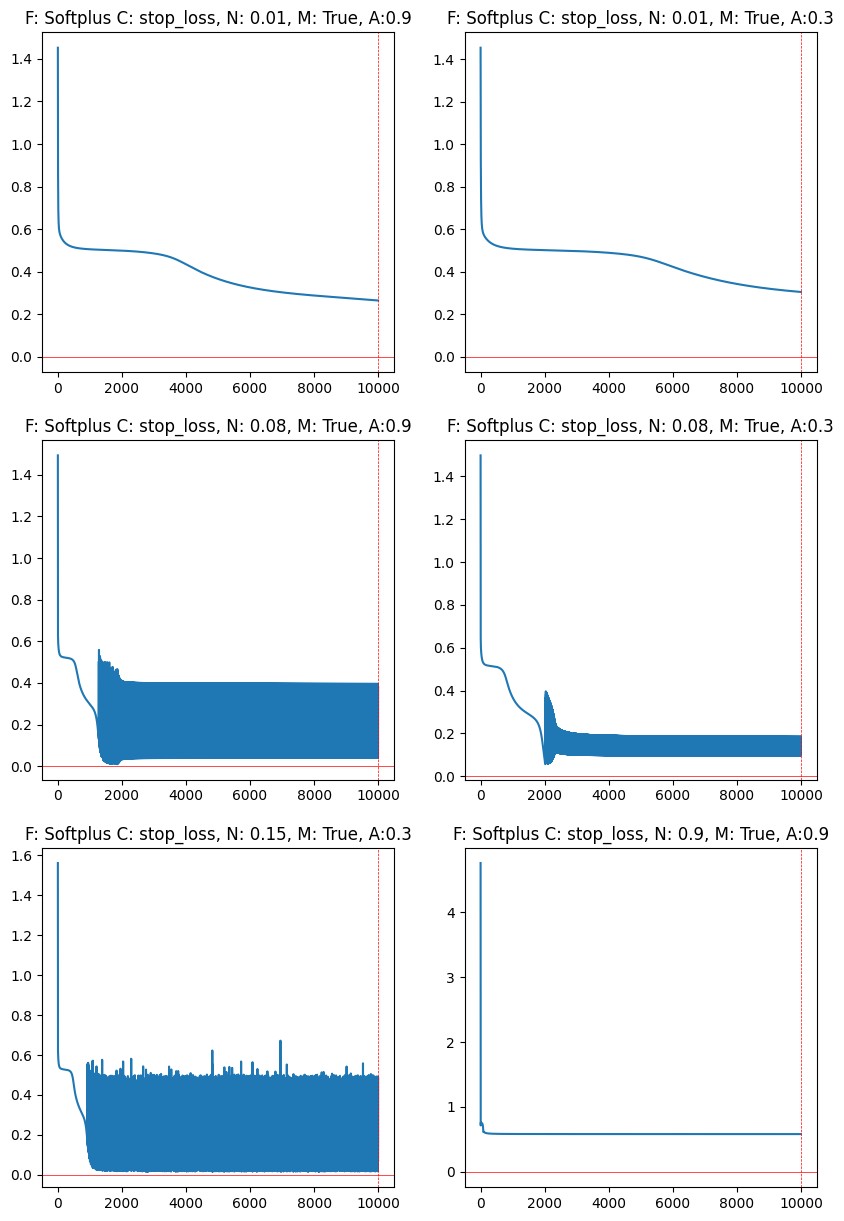

In [28]:
plot_history(loss_history_dict_softplus)